**Problems**:
You have a bag containing *n* balls of *n* different colours. Select 2 balls randomly (in order, so there's a first and a second), repaint the first in the same colour as the second, and replace both balls in the bag. Keep on doing this once per minute until all balls in the bag are the same colour.
**What is the expected time this will take?**

reference: https://puzzling.stackexchange.com/questions/16049/how-long-until-all-balls-are-the-same-colour

In [13]:
import random

n=3
balls = range(n)
all_same = True
class Game(object):
    def __init__(self, n=2):
        self.num_balls = n
        self.balls = range(n)
    
    def _is_all_same(self):
        return len(set(self.balls))==1

    def get_num_rounds(self):
        rounds = 0
        while not self._is_all_same():
            first, second = random.sample(range(self.num_balls), 2)
            self.balls[second]=self.balls[first]
            rounds += 1
        return rounds


In [15]:
x = []
y = []
for i in range(2,20):
    total = 0
    iterations = 1000
    for j in range(iterations):
        g = Game(i)
        total += g.get_num_rounds()
    mean = float(total/iterations)
    print 'number of balls: %d . Average rounds: %d' % (i, mean)
    x.append(i)
    y.append(mean)

number of balls: 2 . Average rounds: 1
number of balls: 3 . Average rounds: 4
number of balls: 4 . Average rounds: 8
number of balls: 5 . Average rounds: 16
number of balls: 6 . Average rounds: 25
number of balls: 7 . Average rounds: 37
number of balls: 8 . Average rounds: 49
number of balls: 9 . Average rounds: 64
number of balls: 10 . Average rounds: 81
number of balls: 11 . Average rounds: 101
number of balls: 12 . Average rounds: 118
number of balls: 13 . Average rounds: 144
number of balls: 14 . Average rounds: 167
number of balls: 15 . Average rounds: 193
number of balls: 16 . Average rounds: 220
number of balls: 17 . Average rounds: 253
number of balls: 18 . Average rounds: 283
number of balls: 19 . Average rounds: 326


In [16]:
#import matplotlib
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

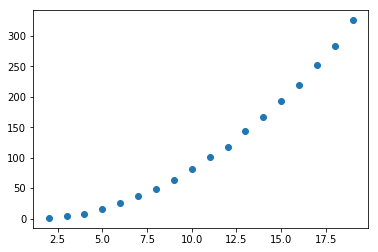

In [41]:
plt.scatter(x,y)

In [37]:
[ for a in x]

[0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12, 13, 18, 19, 16, 17]

In [38]:
xx = [(a-1)*(a-1) for a in x]
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

df = pd.DataFrame({
    'x':x,
    'xx':xx,
    'y':y
})
model = linear_model.LinearRegression()
model.fit(df[['x','xx']], df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
expected = y
predicted = model.predict(df[['x','xx']])
# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print model.intercept_, model.coef_, mse, 

0.387899896801 [-0.0496646   0.99213106] 3.28245040706


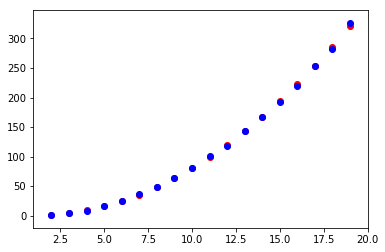

In [42]:
plt.scatter(x,predicted,c='r')
plt.scatter(x,expected,c='b')